<a href="https://colab.research.google.com/github/Thanawat2002/colab/blob/main/Deploying_Machine_Learning_Models_From_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras

In [2]:
pip install tensorflow

In [3]:
from keras import Sequential
from keras.layers import Dense

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files
uploaded = files.upload()
iris = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

Saving iris.csv to iris.csv


In [5]:
iris.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
#Splitting the data into training and test test
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values # attribute 4 is label data


from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y) # y1 is converted to numeric (0 , 1, 2)
Y = pd.get_dummies(y1).values  # convert to (1 0 0, 0 1 0  ,0 0 1)


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [7]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

# Softmax
Softmax function เข้าใจง่าย ๆ ว่า Softmax รับตัวเลขเข้าไป แล้วแปลงออกมาเป็น Probability Softmax มักถูกนำไปไว้ Layer สุดท้าย ของ Neural Network เพื่อให้ Output ออกมาเป็น Probability

# ระหว่าง Softmax กับ Sigmoid ฟังก์ชั่นทั้งสองอันไหนดีกว่า
ตอบ: ขึ้นอยู๋กับคลาสงาน ถ้าเป็นงานทางด้าน multiclass classification จะนิยมใช้ Softmax แต่จริงๆ ทั้งสอง function ใช้กับงาน multiclass ได้ ขึ้นอยู่กับ architecture ของ NN ของเรา เช่น ถ้าเราต้องการแค่ค่า maximum เป้าหมายอย่างเดียวเช่นแยกภาพ หมา แมว กระต่าย softmax เป็นทางเลือกที่ง่ายกว่า แต่ถ้าต้องการคำตอบแบบเป็น ranking กรณีที่คำตอบมันอาจจะเป็นก้ำกึ่งๆระหว่างคลาสได้เช่น แยกพันธ์หมา แล้วมีพวกพันธ์ที่คล้ายกันอยู่มากเช่น พันธ์ชิบะ อาคิตะ คอร์กิ (multiclass relevance) sigmoid จะช่วยให้เราจัดอันดับแร้งค์กิ้งได้ดีกว่า

# Stochastic Gradient Descent(SGD)  
เป็นอัลกอริทึมที่อัพเดทค่าพารามิเตอร์ในทุกๆชุดข้อมูลฝึกฝน เป็นอัลกอริทึมที่ค่อนข้างไว อัพเดทแค่ครั้งเดียวต่อการเทรน 1 รอบ

In [9]:
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

classifier = Sequential()

classifier.add(Dense(10,input_shape=(4,),activation='relu'))
classifier.add(Dense(8,activation='relu'))
classifier.add(Dense(6,activation='relu'))
classifier.add(Dense(3,activation='softmax'))
opt = SGD(lr=0.00001)
classifier.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
Total params: 213 (852.00 Byte)
Trainable params: 213 (852.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
#classifier.fit(X_train,y_train, batch_size=10, epochs=100)
history = classifier.fit(X_train, y_train, batch_size=10, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 22ms/step - loss: 0.4349 - accuracy: 0.8500 - val_loss: 0.4234 - val_accuracy: 0.8333
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8333 - val_loss: 0.4019 - val_accuracy: 1.0000
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3977 - accuracy: 0.9000 - val_loss: 0.3922 - val_accuracy: 1.0000
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4015 - accuracy: 0.8333 - val_loss: 0.3618 - val_accuracy: 1.0000
Epoch 5/100
12/12 [==============================] - 0s 13ms/step - loss: 0.3939 - accuracy: 0.8667 - val_loss: 0.4263 - val_accuracy: 0.7000
Epoch 6/100
12/12 [==============================] - 0s 16ms/step - loss: 0.3753 - accuracy: 0.8667 - val_loss: 0.3846 - val_accuracy: 0.8000
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3601 - accuracy: 0.8833 - val_loss: 0.3710 - val_accuracy: 0.8333
Epoch 8/10

In [16]:
eval_model=classifier.evaluate(X_test, y_test)
eval_model


1/1 [==============================] - 0s 21ms/step - loss: 0.0543 - accuracy: 1.0000


[0.05427069589495659, 1.0]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


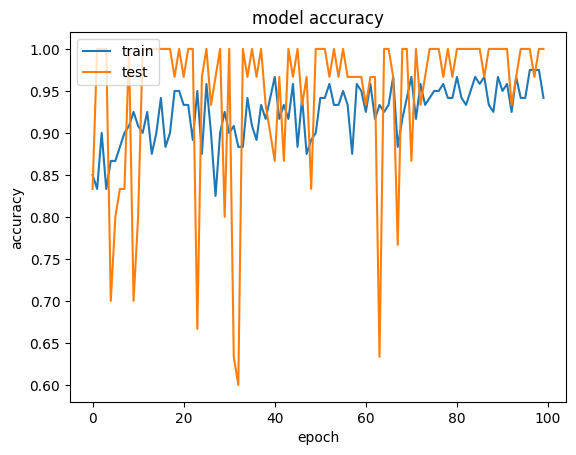

In [17]:
import matplotlib.pyplot as plt # For graphical representation
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [18]:
y_pred = classifier.predict(X_test)

y_test_class = np.argmax(y_test,axis=-1)
y_pred_class = np.argmax(y_pred,axis=-1)

1/1 [==============================] - 0s 18ms/step


In [19]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test_class,y_pred_class))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


# save model

In [21]:
classifier.save("iris_model.h5")
print('saved iris model to disk')

saved iris model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
import pickle
Pkl_Filename = "iris_model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(classifier, file)

# Load model

In [23]:
from numpy import loadtxt
from keras.models import load_model
#load model
model = load_model('iris_model.h5')
#summaize model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
Total params: 213 (852.00 Byte)
Trainable params: 213 (852.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
pickled_model = pickle.load(open('iris_model.pkl', 'rb'))
#pickled_model.predict(X_test)
#summaize model
pickled_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
Total params: 213 (852.00 Byte)
Trainable params: 213 (852.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Load Unseen

In [25]:
uploaded = files.upload()
udata = pd.read_csv(io.BytesIO(uploaded['iris_unseen.csv']))
Xnew= udata.iloc[:,0:4]

Xnew

Saving iris_unseen.csv to iris_unseen.csv


,sepal_length,sepal_width,petal_length,petal_width
0,3.5,4.5,2.1,1.3
1,4.2,2.1,1.6,2.6
2,5.3,3.2,6.5,1.2
3,4.3,2.8,2.5,0.3
4,5.9,3.0,5.1,1.8


# classify unseen

In [26]:

yacc= pickled_model.predict(Xnew)
yacc


1/1 [==============================] - 0s 45ms/step


array([[9.7324908e-01, 2.6750557e-02, 2.9538734e-07],
       [1.9835238e-04, 6.3432491e-01, 3.6547682e-01],
       [1.1720785e-09, 7.4145617e-03, 9.9258548e-01],
       [9.6928275e-01, 3.0717069e-02, 2.6233286e-07],
       [3.7655067e-08, 5.3539656e-02, 9.4646025e-01]], dtype=float32)

In [27]:
classes_x=np.argmax(yacc,axis=-1) #majority vote from the prediction

for i in range(len(classes_x)):
  print("The label of unsenn data is ", yacc[i], '\t', classes_x[i])

The label of unsenn data is  [9.7324908e-01 2.6750557e-02 2.9538734e-07] 	 0
The label of unsenn data is  [1.9835238e-04 6.3432491e-01 3.6547682e-01] 	 1
The label of unsenn data is  [1.1720785e-09 7.4145617e-03 9.9258548e-01] 	 2
The label of unsenn data is  [9.6928275e-01 3.0717069e-02 2.6233286e-07] 	 0
The label of unsenn data is  [3.7655067e-08 5.3539656e-02 9.4646025e-01] 	 2


# Deploying your model on web application
เราจะใช้ ngrok ในการ delopy model ขึ้นดังนั้น ก่อนจะทำการ deploy จะต้องมีการติดตั้งและการ authen  token  ก่อน ให้สมัครสมาชิกและทำการ generate token ขึ้นมา
ไปที่ https://dashboard.ngrok.com/login

In [28]:
pip install flask-ngrok

In [29]:
from google.colab import drive
drive.mount('/content/drive') #ระวังเครื่องหมาย ‘ กับ ' ต่างกันนะคะ

Mounted at /content/drive


In [30]:
cd /content/drive/MyDrive/Colab Notebooks/web_iris

/content/drive/MyDrive/Colab Notebooks/web_iris


# Import required packages

In [31]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template
import pickle
import numpy as np

In [32]:
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.0-py3-none-any.whl size=21129 sha256=95b97722a1f337b93d1cb9992ff74004bfa6bac89317e0592aa8e26810bb245d
  Stored in directory: /root/.cache/pip/wheels/60/29/7b/f64332aa7e5e88fbd56d4002185ae22dcdc83b35b3d1c2cbf5
Successfully built pyngrok


In [33]:
!ngrok authtoken 2U3gy5LVLYWVaLhAGL1ObRjjjm9_4Cu5Pbt1mxn7Q2nK95xMW

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


# Create Flask application

In [34]:
from keras.models import load_model

app = Flask(__name__)

run_with_ngrok(app)

model = pickle.load(open('iris_model.pkl','rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=["POST"])

def predict():
    if request.method == 'POST':
        petal_length = request.form['petal_length']
        sepal_length = request.form['sepal_length']
        petal_width = request.form['petal_width']
        sepal_width = request.form['sepal_width']

        sample_data = [sepal_length, sepal_width, petal_length, petal_width]
        clean_data = [float(i) for i in sample_data]

        final_input = np.array(clean_data).reshape(1,-1)
        print(final_input)

        prediction = model.predict(final_input)
        class_unseen=np.argmax(prediction,axis=-1) #majority vote from the prediction
        print("predictedclass ",class_unseen)

    return render_template('index.html',result_prediction=class_unseen)

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://aae6-35-245-10-115.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [12/Oct/2023 06:58:48] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2023 06:58:49] "GET /favicon.ico HTTP/1.1" 404 -


[[4. 2. 0. 0.]]
1/1 [==============================] - 0s 47ms/step


INFO:werkzeug:127.0.0.1 - - [12/Oct/2023 06:59:00] "POST /predict HTTP/1.1" 200 -


predictedclass  [0]


INFO:werkzeug:127.0.0.1 - - [12/Oct/2023 06:59:01] "GET /static/iris_versicolor.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2023 06:59:02] "GET /static/iris_versicolor.jpg HTTP/1.1" 304 -


[[8. 5. 7. 3.]]
1/1 [==============================] - 0s 16ms/step


INFO:werkzeug:127.0.0.1 - - [12/Oct/2023 07:00:54] "POST /predict HTTP/1.1" 200 -


predictedclass  [2]


INFO:werkzeug:127.0.0.1 - - [12/Oct/2023 07:00:55] "GET /static/iris_virginica.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Oct/2023 07:00:56] "GET /static/iris_virginica.jpg HTTP/1.1" 304 -


[[5.6 4.4 7.  3. ]]
1/1 [==============================] - 0s 16ms/step


INFO:werkzeug:127.0.0.1 - - [12/Oct/2023 07:04:54] "POST /predict HTTP/1.1" 200 -


predictedclass  [2]


INFO:werkzeug:127.0.0.1 - - [12/Oct/2023 07:04:54] "GET /static/iris_virginica.jpg HTTP/1.1" 304 -


[[4. 2. 0. 2.]]
1/1 [==============================] - 0s 22ms/step


INFO:werkzeug:127.0.0.1 - - [12/Oct/2023 07:05:10] "POST /predict HTTP/1.1" 200 -


predictedclass  [0]


INFO:werkzeug:127.0.0.1 - - [12/Oct/2023 07:05:10] "GET /static/iris_versicolor.jpg HTTP/1.1" 304 -
